In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from skimage import io

import sys
sys.path.append('../scripts/')
from process_images import framework

In [2]:
matplotlib.rcParams['figure.labelsize']= 20
matplotlib.rcParams['axes.titlesize']= 20

In [3]:
img0 = io.imread('../exp-data/20251004/60V_10X/0.01 s.tif', as_gray=True)
S_len0, sk0  = framework(img0, skleton_img=True)

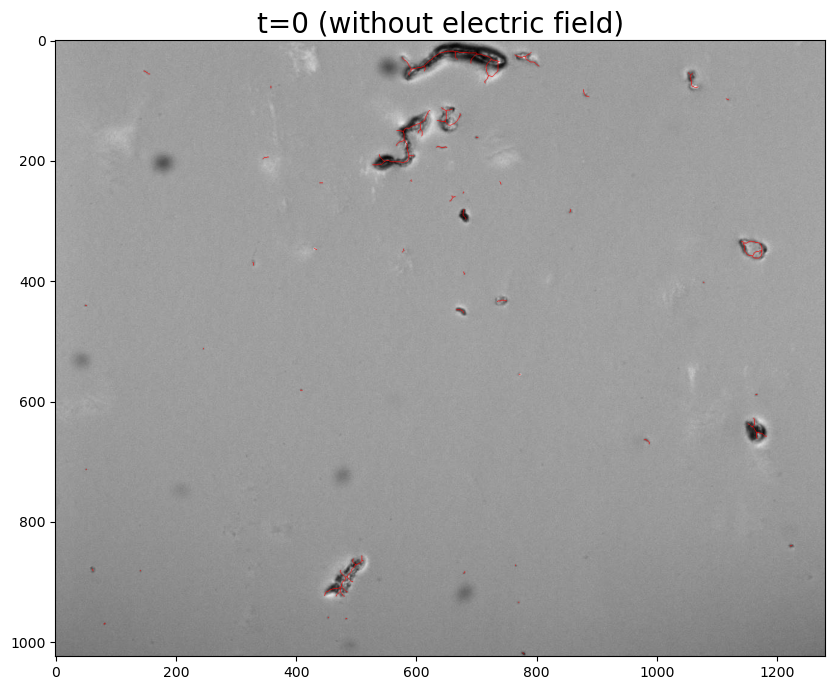

In [4]:
skeleton0 = sk0.astype(bool)
img0_norm = (img0 - img0.min()) / (img0.max() - img0.min())

img0_rgb = np.dstack([img0_norm, img0_norm, img0_norm])
overlay0 = img0_rgb.copy()
overlay0[skeleton0] = [1.0, 0.0, 0.0]

fig = plt.figure(figsize=(10,8))
plt.tight_layout()

plt.imshow(overlay0)
plt.title('t=0 (without electric field)')
plt.savefig('../figs/60V_dyn_0.png')

In [5]:
img1 = io.imread('../exp-data/20251004/60V_10X/1.23 s.tif', as_gray=True)
S_len1, sk1  = framework(img1, skleton_img=True)

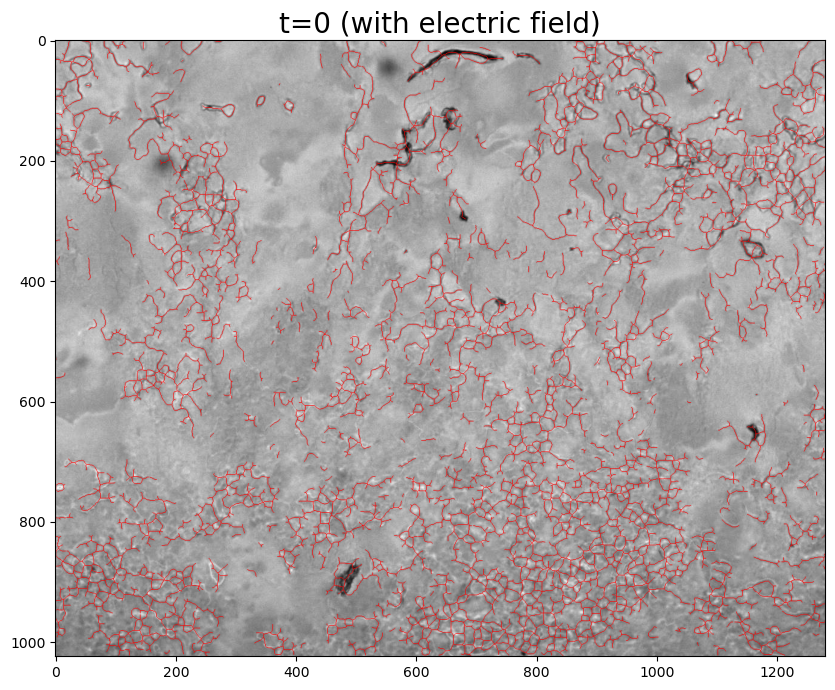

In [6]:
skeleton1 = sk1.astype(bool)
img1_norm = (img1 - img1.min()) / (img1.max() - img1.min())

img1_rgb = np.dstack([img1_norm, img1_norm, img1_norm])
overlay1 = img1_rgb.copy()
overlay1[skeleton1] = [1.0, 0.0, 0.0]

fig = plt.figure(figsize=(10,8))

plt.imshow(overlay1)
plt.title('t=0 (with electric field)')
plt.savefig('../figs/60V_dyn_0e.png')

In [7]:
img2 = io.imread('../exp-data/20251004/60V_10X/1.73 s.tif', as_gray=True)
S_len2, sk2  = framework(img2, skleton_img=True)

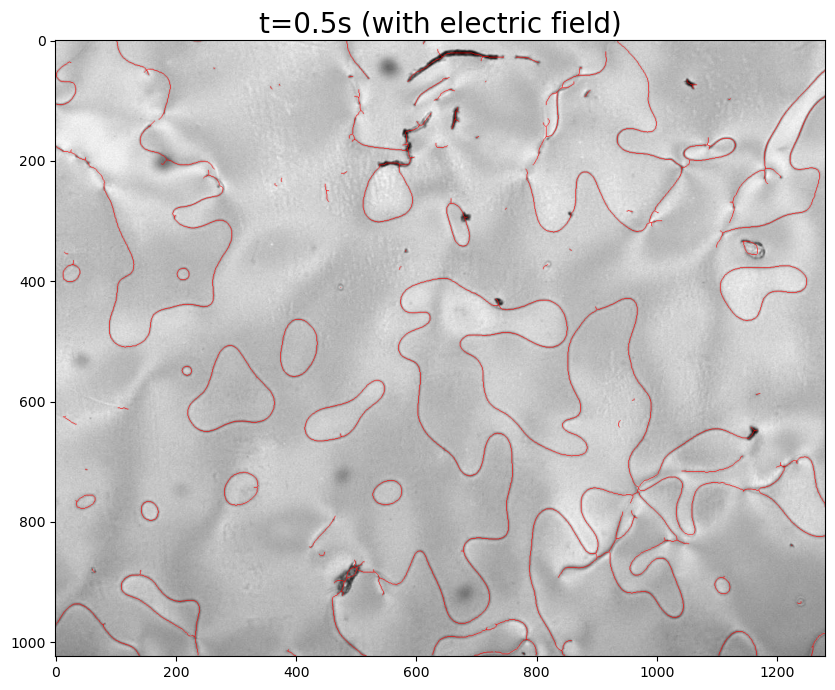

In [8]:
skeleton2 = sk2.astype(bool)
img2_norm = (img2 - img2.min()) / (img2.max() - img2.min())

img2_rgb = np.dstack([img2_norm, img2_norm, img2_norm])
overlay2 = img2_rgb.copy()
overlay2[skeleton2] = [1.0, 0.0, 0.0]

fig = plt.figure(figsize=(10,8))

plt.imshow(overlay2)
plt.title('t=0.5s (with electric field)')
plt.savefig('../figs/60V_dyn_50e.png')

In [9]:
img3 = io.imread('../exp-data/20251004/60V_10X/3.23 s.tif', as_gray=True)
S_len3, sk3  = framework(img3, skleton_img=True)

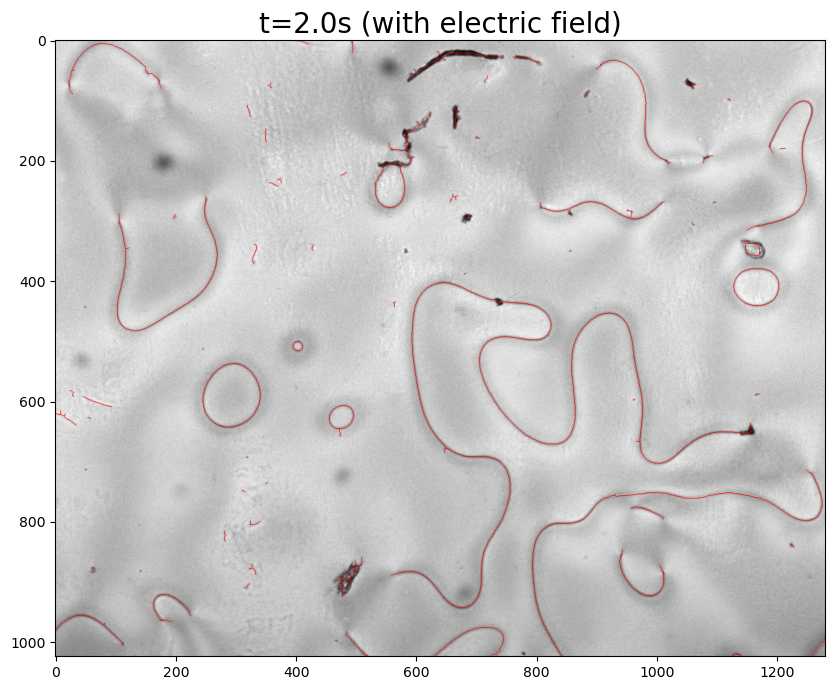

In [10]:
skeleton3 = sk3.astype(bool)
img3_norm = (img3 - img3.min()) / (img3.max() - img3.min())

img3_rgb = np.dstack([img3_norm, img3_norm, img3_norm])
overlay3 = img3_rgb.copy()
overlay3[skeleton3] = [1.0, 0.0, 0.0]

fig = plt.figure(figsize=(10,8))

plt.imshow(overlay3)
plt.title('t=2.0s (with electric field)')
plt.savefig('../figs/60V_dyn_200e.png')

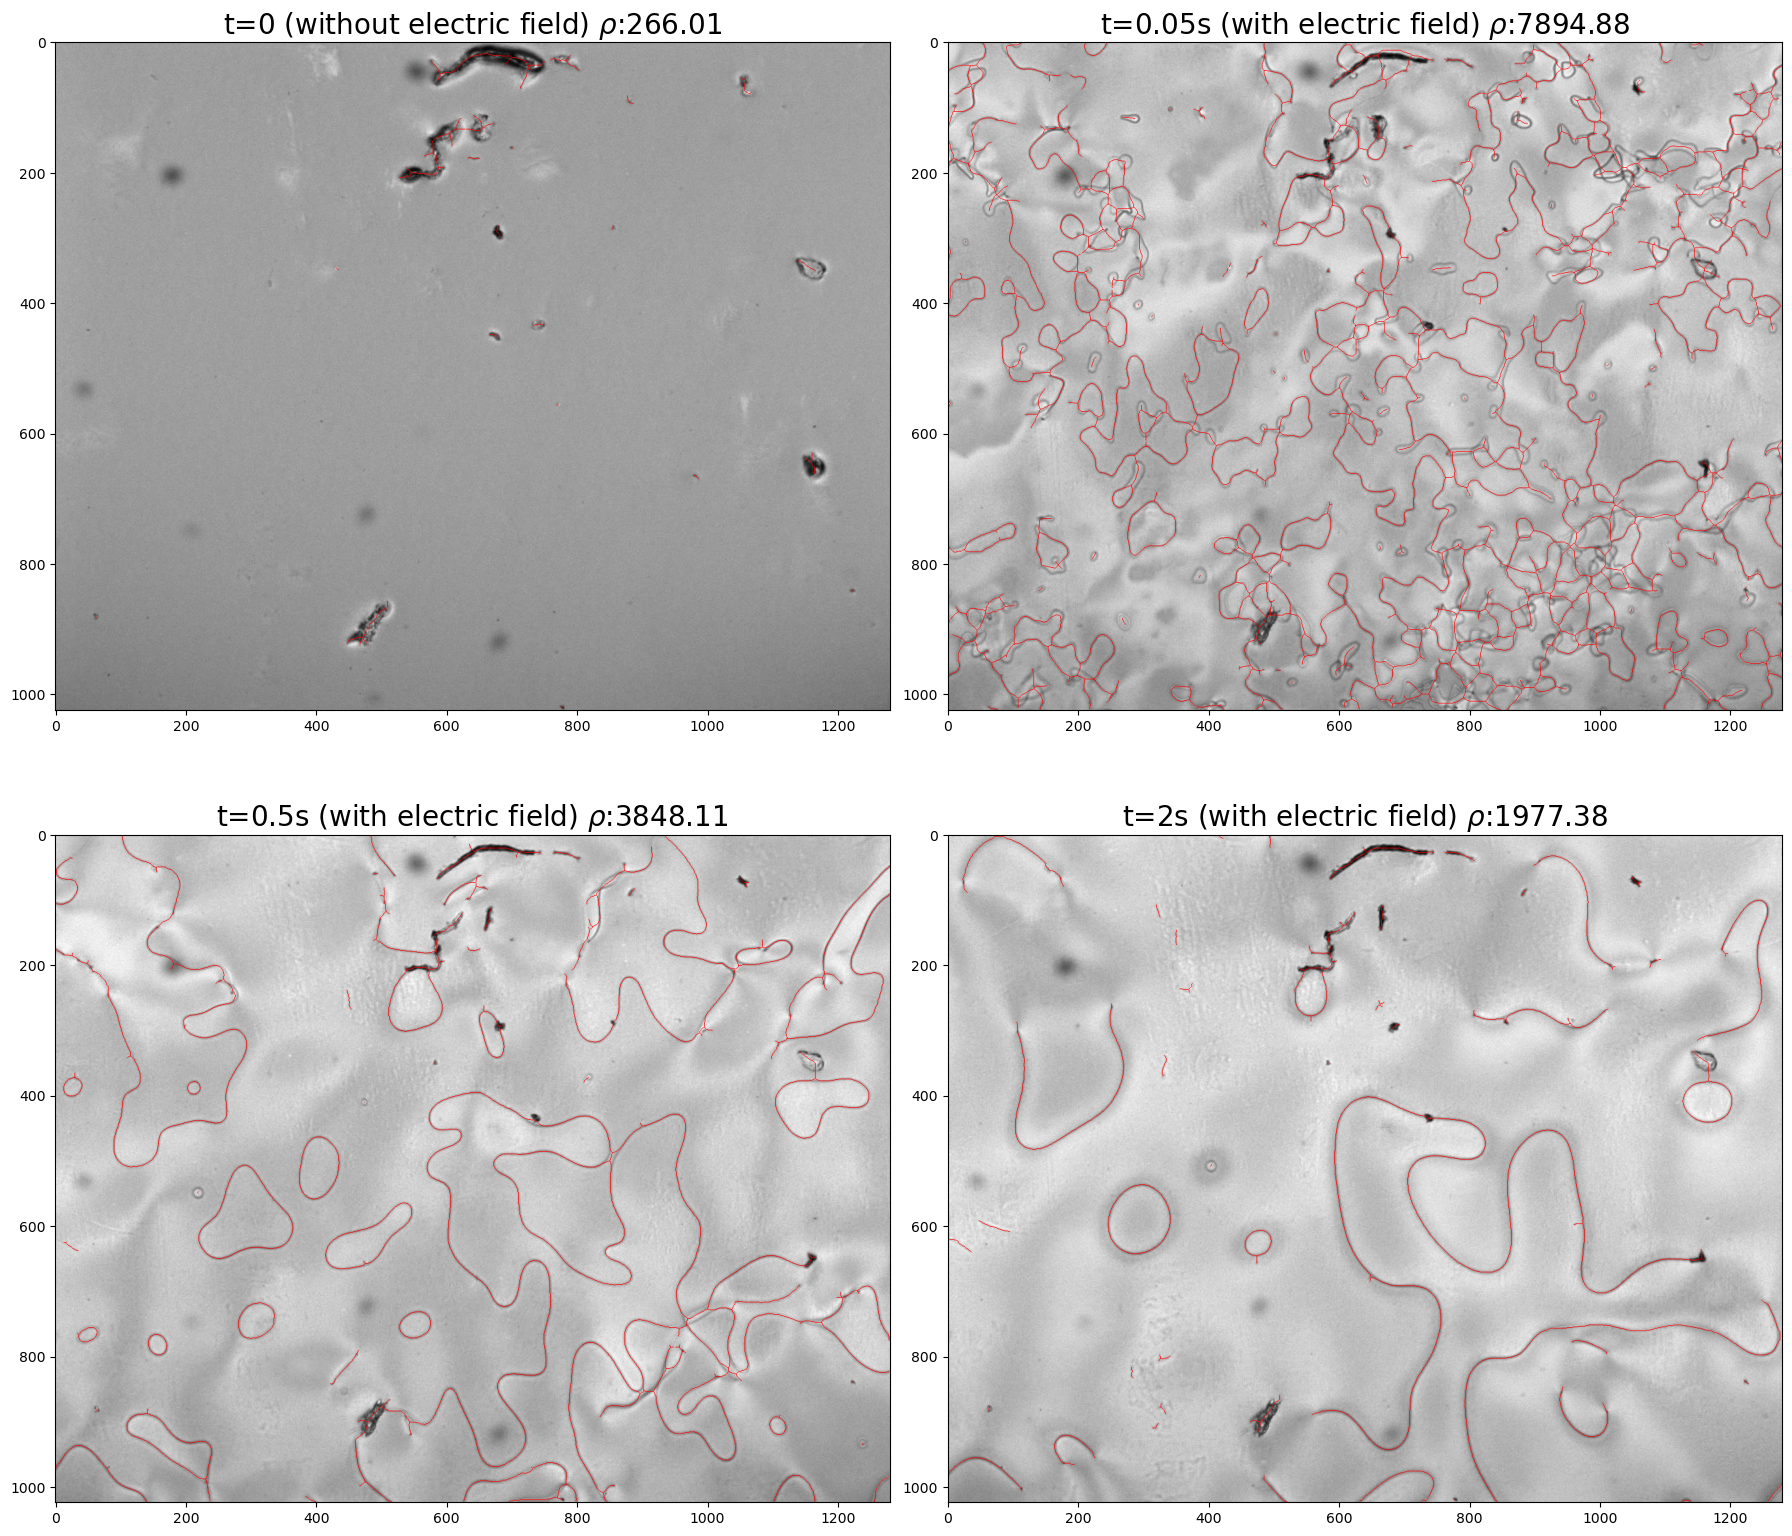

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(18, 16))
ax = axes.flatten()
plt.tight_layout()

frames = np.array([0.01, 1.28, 1.73, 3.23])
den = []
for i in range(len(frames)):
    img0 = io.imread('../exp-data/20251004/60V_10X/{:.2f} s.tif'.format(frames[i]), as_gray=True)
    S_den0, sk0  = framework(img0, hysteresis_th=[0.08, 0.2], closing_footprint=7, skleton_img=True)
    den.append(S_den0)
    
    skeleton0 = sk0.astype(bool)
    img0_norm = (img0 - img0.min()) / (img0.max() - img0.min())
    
    img0_rgb = np.dstack([img0_norm, img0_norm, img0_norm])
    overlay0 = img0_rgb.copy()
    overlay0[skeleton0] = [1.0, 0.0, 0.0]
    ax[i].imshow(overlay0)

ax[0].set_title(r't=0 (without electric field) $\rho$:{:.2f}'.format(den[0]))
ax[1].set_title(r't={:}s (with electric field) $\rho$:{:.2f}'.format(0.05, den[1]))
ax[2].set_title(r't={:}s (with electric field) $\rho$:{:.2f}'.format(0.5, den[2]))
ax[3].set_title(r't={:}s (with electric field) $\rho$:{:.2f}'.format(2, den[3]))


plt.savefig('../figs/old_60V_dyn.png')